In [117]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [118]:
df=pd.read_csv('automobile_insurance_claims.csv')

In [119]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      2015-01-25  Single Vehicle Collision   Side Collision   
1      2015-01-21             Vehicle Theft                ?   
2      2015-02-22   Multi-vehicle Collision   Rear Collision   
3      2015-01-10  Single Vehicle Collision  Front Collision   
4      2015-02-17             Vehicle Theft                ?   
..   

In [120]:
df.duplicated('policy_number').sum() 

0

In [121]:
df.isin([' ','NA','-']).sum().any()

False

In [122]:
df.isin(['?']).sum().any()

True

In [123]:
df=df.replace('?',np.NaN)

In [124]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
authorities_contacted                    91             9.1
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
total_claim_amount                        0             0.0
injury_claim                            

In [125]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [126]:
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

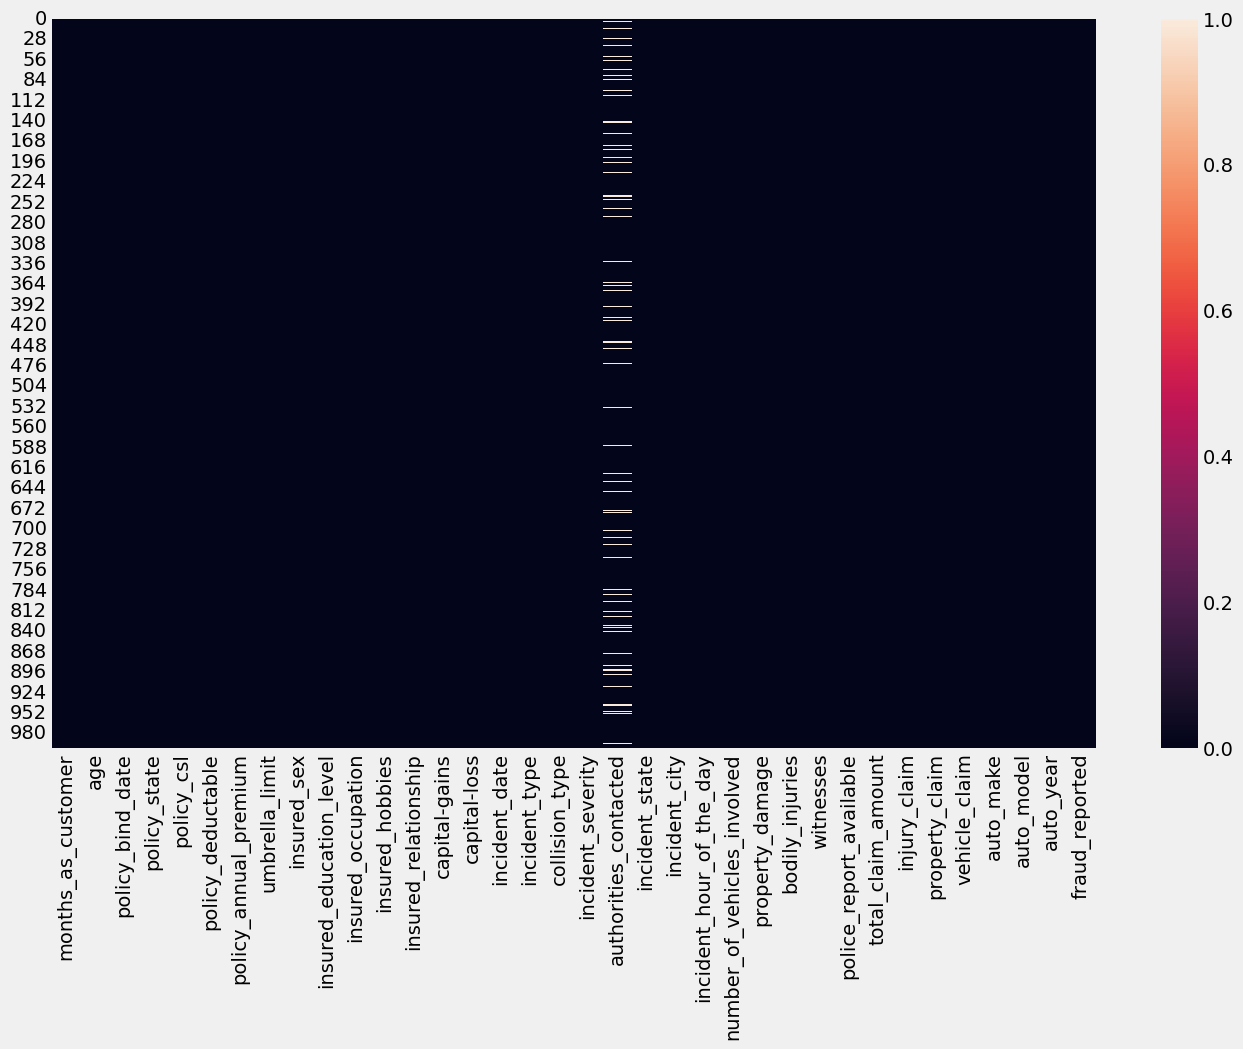

In [127]:
sns.heatmap(df.isnull())
plt.show()

In [128]:
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [129]:
df.drop("policy_csl",axis=1,inplace=True)

In [130]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [131]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

In [132]:
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [133]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [134]:
df.drop(['incident_year'],axis=1,inplace=True)

In [135]:
df['Automobile_Age']=2015 - df['auto_year']

In [136]:
df.drop("auto_year",axis=1,inplace=True)

In [137]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']

In [138]:
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [139]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
policy_bind_day              1000.0  1.544800e+01  8.808001e+00        1.00   
policy_bind_month            1000.0  6.559000e+00  3.499824e+00        1.00   
policy_bind_year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_day                 1000.0  1.499500e+01  8.670995e+00        1.00   
incident_month               1000.0  1.496000e+00  5.236967e-01        1.00   
Automobile_Age               1000.0  9.897000e+00  6.015861e+00        0.00   

                                    25%      50%        75%          max  
months_as_customer             115.7500    199.5    276.250       479.00  
age                             32.0000     38.0     44.000        64.00  
policy_deductable              500.0000   1000.0   2000.000      2000.00  
policy_annual_premium         1089.6075   1257.2   1415.695      2047.59  
umbrella_limit                   0.0000      0.0      0.000  10000000.00  
capital-gains                    0.0000      0.0  51025.000    100500.00  
capital-loss                -51500.0000 -23250.0      0.000         0.00  
incident_hour_of_the_day         6.0000     12.0     17.000        23.00  
number_of_vehicles_involved      1.0000      1.0      3.000         4.00  
bodily_injuries                  0.0000      1.0      2.000         2.00  
witnesses                        1.0000      1.0      2.000         3.00  
total_claim_amount           41812.5000  58055.0  70592.500    114920.00  
injury_claim                  4295.0000   6775.0  11305.000     21450.00  
property_claim                4445.0000   6750.0  10885.000     23670.00  
vehicle_claim                30292.5000  42100.0  50822.500     79560.00  
policy_bind_day                  8.0000     16.0     23.000        31.00  
policy_bind_month                3.0000      7.0     10.000        12.00  
policy_bind_year              1995.0000   2002.0   2008.000      2015.00  
incident_day                     7.7500     15.0     22.000        31.00  
incident_month                   1.0000      1.0      2.000         3.00  
Automobile_Age                   5.0000     10.0     15.000        20.00

In [140]:
df[Category].describe().T

count unique                      top freq
policy_state             1000      3                       OH  352
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      3           Rear Collision  470
incident_severity        1000      4             Minor Damage  354
authorities_contacted     909      4                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
property_damage          1000      2                       NO  698
police_report_available  1000      2                       NO  686
auto_make                1000     14                     Saab   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

In [141]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
insured_sex
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
insured_hobbies
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking      

In [142]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


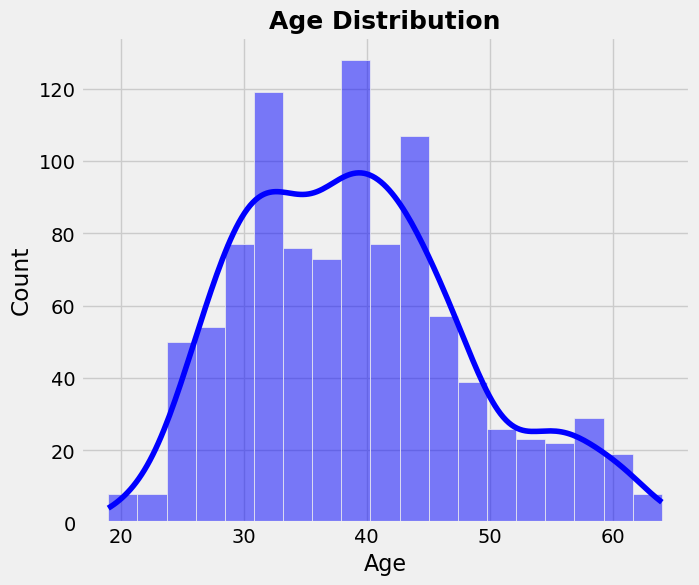

In [143]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [144]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

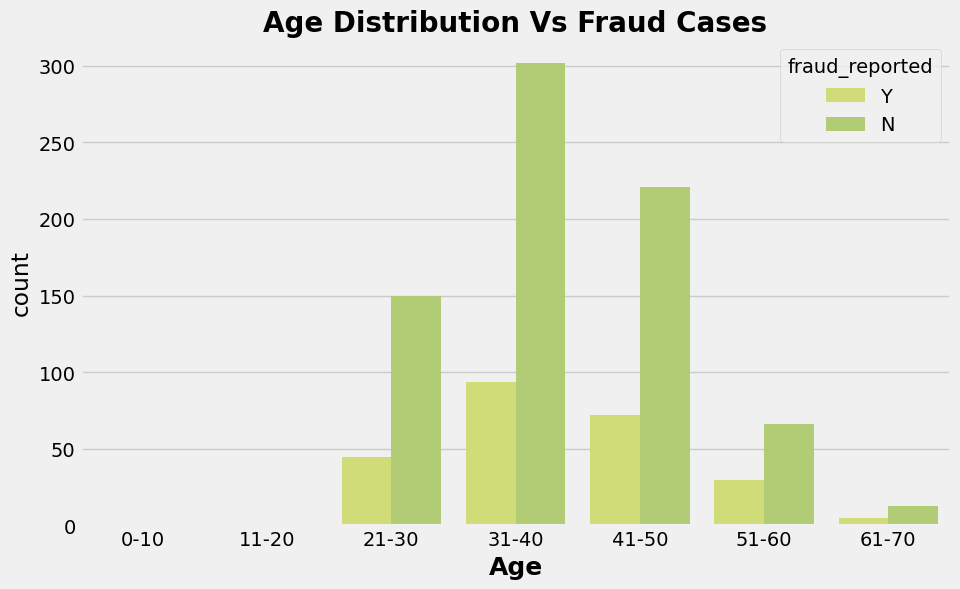

In [145]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

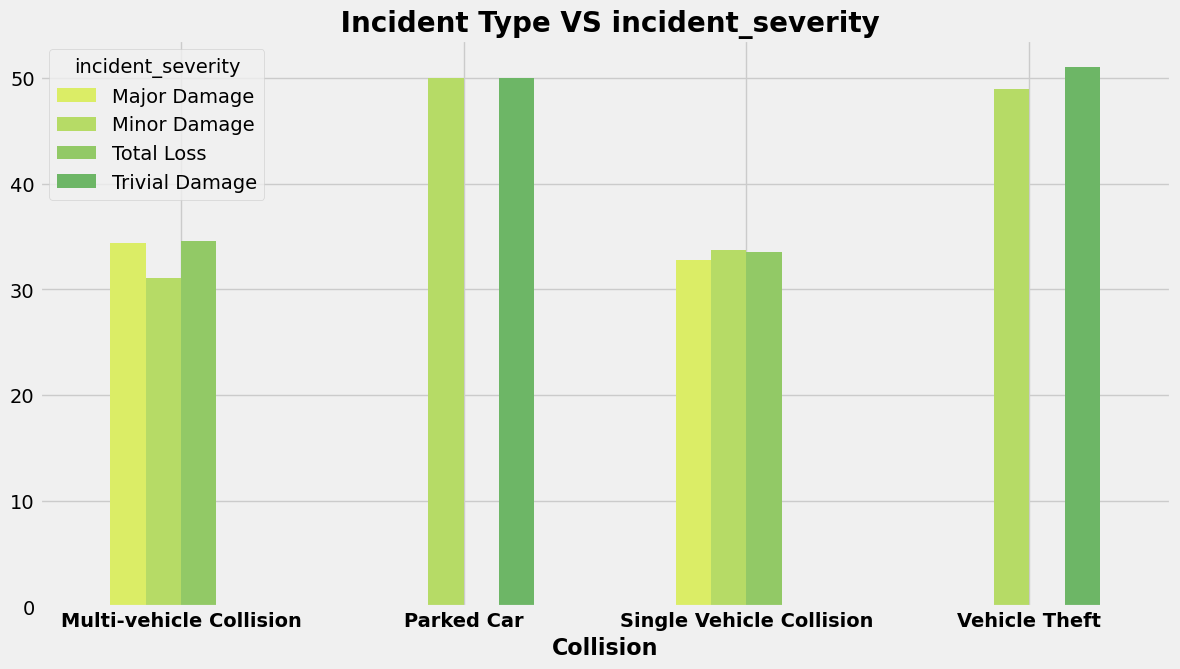

In [146]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

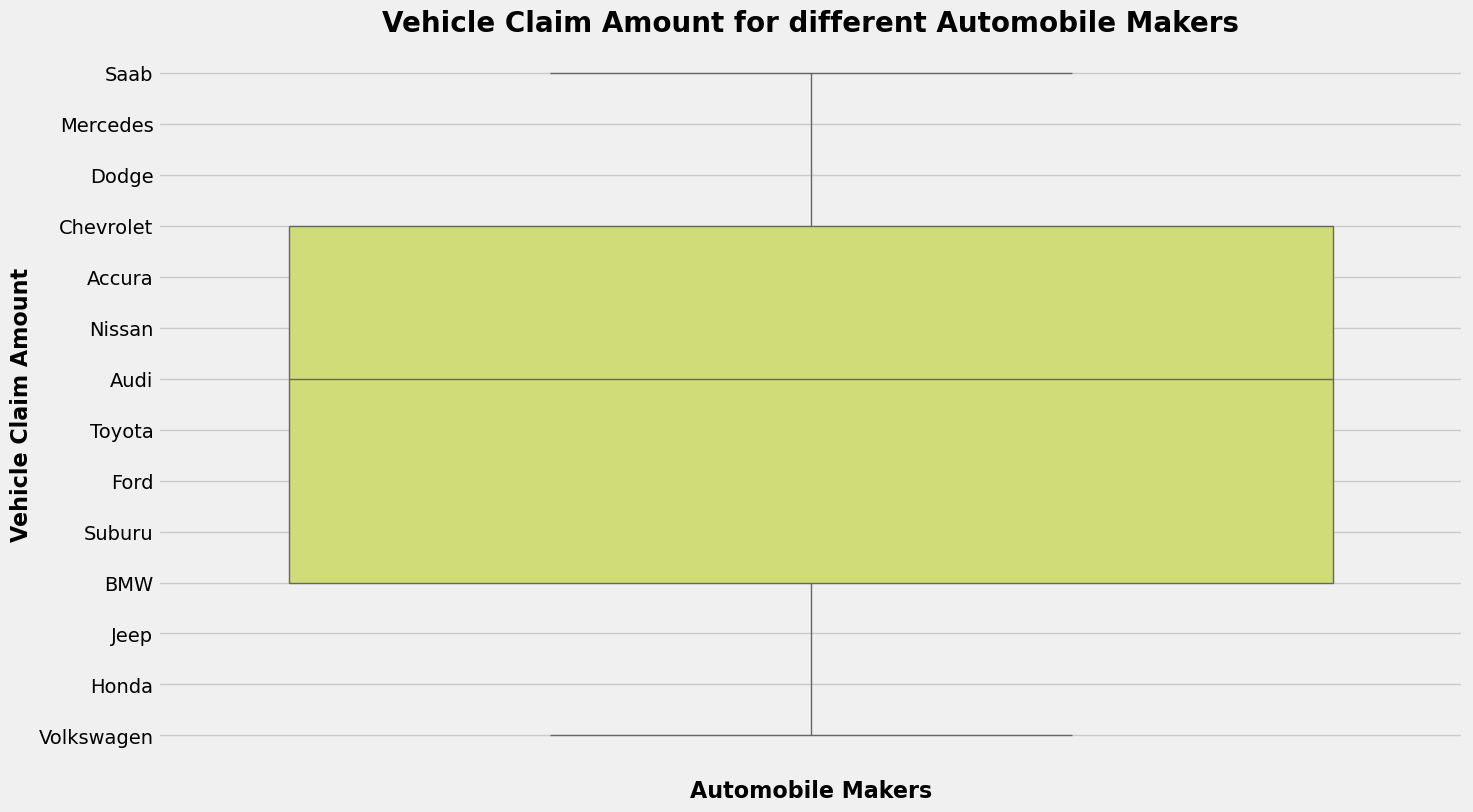

In [147]:
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'])
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [148]:
pd.set_option('display.max_columns', None)
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                   NaN             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               17   
1              Y          250            500               27   
2              N          100            300                6   
3              Y          250            500               25   
4              N          500           1000                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25      

In [149]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model','CSL_Personal', 'CSL_Accidental']

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [151]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   age                          1000 non-null   int64   
 2   policy_state                 1000 non-null   object  
 3   policy_deductable            1000 non-null   int64   
 4   policy_annual_premium        1000 non-null   float64 
 5   umbrella_limit               1000 non-null   int64   
 6   insured_sex                  1000 non-null   object  
 7   insured_education_level      1000 non-null   object  
 8   insured_occupation           1000 non-null   object  
 9   insured_hobbies              1000 non-null   object  
 10  insured_relationship         1000 non-null   object  
 11  capital-gains                1000 non-null   int64   
 12  capital-loss                 1000 non-null   int64   
 13  inci

In [153]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [154]:
for i in Category:
    df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48           2.0               1000   
1                 228   42           1.0               2000   
2                 134   29           2.0               2000   
3                 256   41           0.0               2000   
4                 228   44           0.0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0          1.0   
1                1197.22         5000000          1.0   
2                1413.14         5000000          0.0   
3                1415.74         6000000          0.0   
4                1583.91         6000000          1.0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                      4.0                 2.0             17.0   
1                      4.0                 6.0             15.0   
2                      6.0                11.0              2.0   
3                      6.0                 1.0              2.0   
4                      0.0                11.0              2.0   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                   0.0          53300             0            2.0   
1                   2.0              0             0            3.0   
2                   3.0          35100             0            0.0   
3                   4.0          48900        -62400            2.0   
4                   4.0          66000        -46000            3.0   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0             2.0                0.0                    3.0             4.0   
1             1.0                1.0                    3.0             5.0   
2             1.0                1.0                    3.0             1.0   
3             0.0                0.0                    3.0             2.0   
4             1.0                1.0                    NaN             1.0   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0            1.0                         5                            1   
1            5.0                         8                            1   
2            1.0                         7                            3   
3            0.0                         5                            1   
4            0.0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0              1.0                1          2                      1.0   
1              0.0                0          0                      0.0   
2              0.0                2          3                      0.0   
3              0.0                1          2                      0.0   
4              0.0                0          1                      0.0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       10.0   
1                5070           780             780           3510        8.0   
2               34650          7700            3850          23100        4.0   
3               63400          6340            6340          50720        3.0   
4                6500          1300             650           4550        0.0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0         1.0               1           1.0             2.0               17   
1        12.0               1           1.0             2.0               27   
2        30.0               0           0.0             1.0                6   
3        34.0               1           1.0             2.0               25   
4        31.0               0           2.0             0.0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   age                          1000 non-null   int64   
 2   policy_state                 1000 non-null   float64 
 3   policy_deductable            1000 non-null   int64   
 4   policy_annual_premium        1000 non-null   float64 
 5   umbrella_limit               1000 non-null   int64   
 6   insured_sex                  1000 non-null   float64 
 7   insured_education_level      1000 non-null   float64 
 8   insured_occupation           1000 non-null   float64 
 9   insured_hobbies              1000 non-null   float64 
 10  insured_relationship         1000 non-null   float64 
 11  capital-gains                1000 non-null   int64   
 12  capital-loss                 1000 non-null   int64   
 13  inci

In [156]:
df.drop('age_bins',inplace=True,axis=1)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   float64
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   float64
 7   insured_education_level      1000 non-null   float64
 8   insured_occupation           1000 non-null   float64
 9   insured_hobbies              1000 non-null   float64
 10  insured_relationship         1000 non-null   float64
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [158]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [159]:
len(Numerical)

21

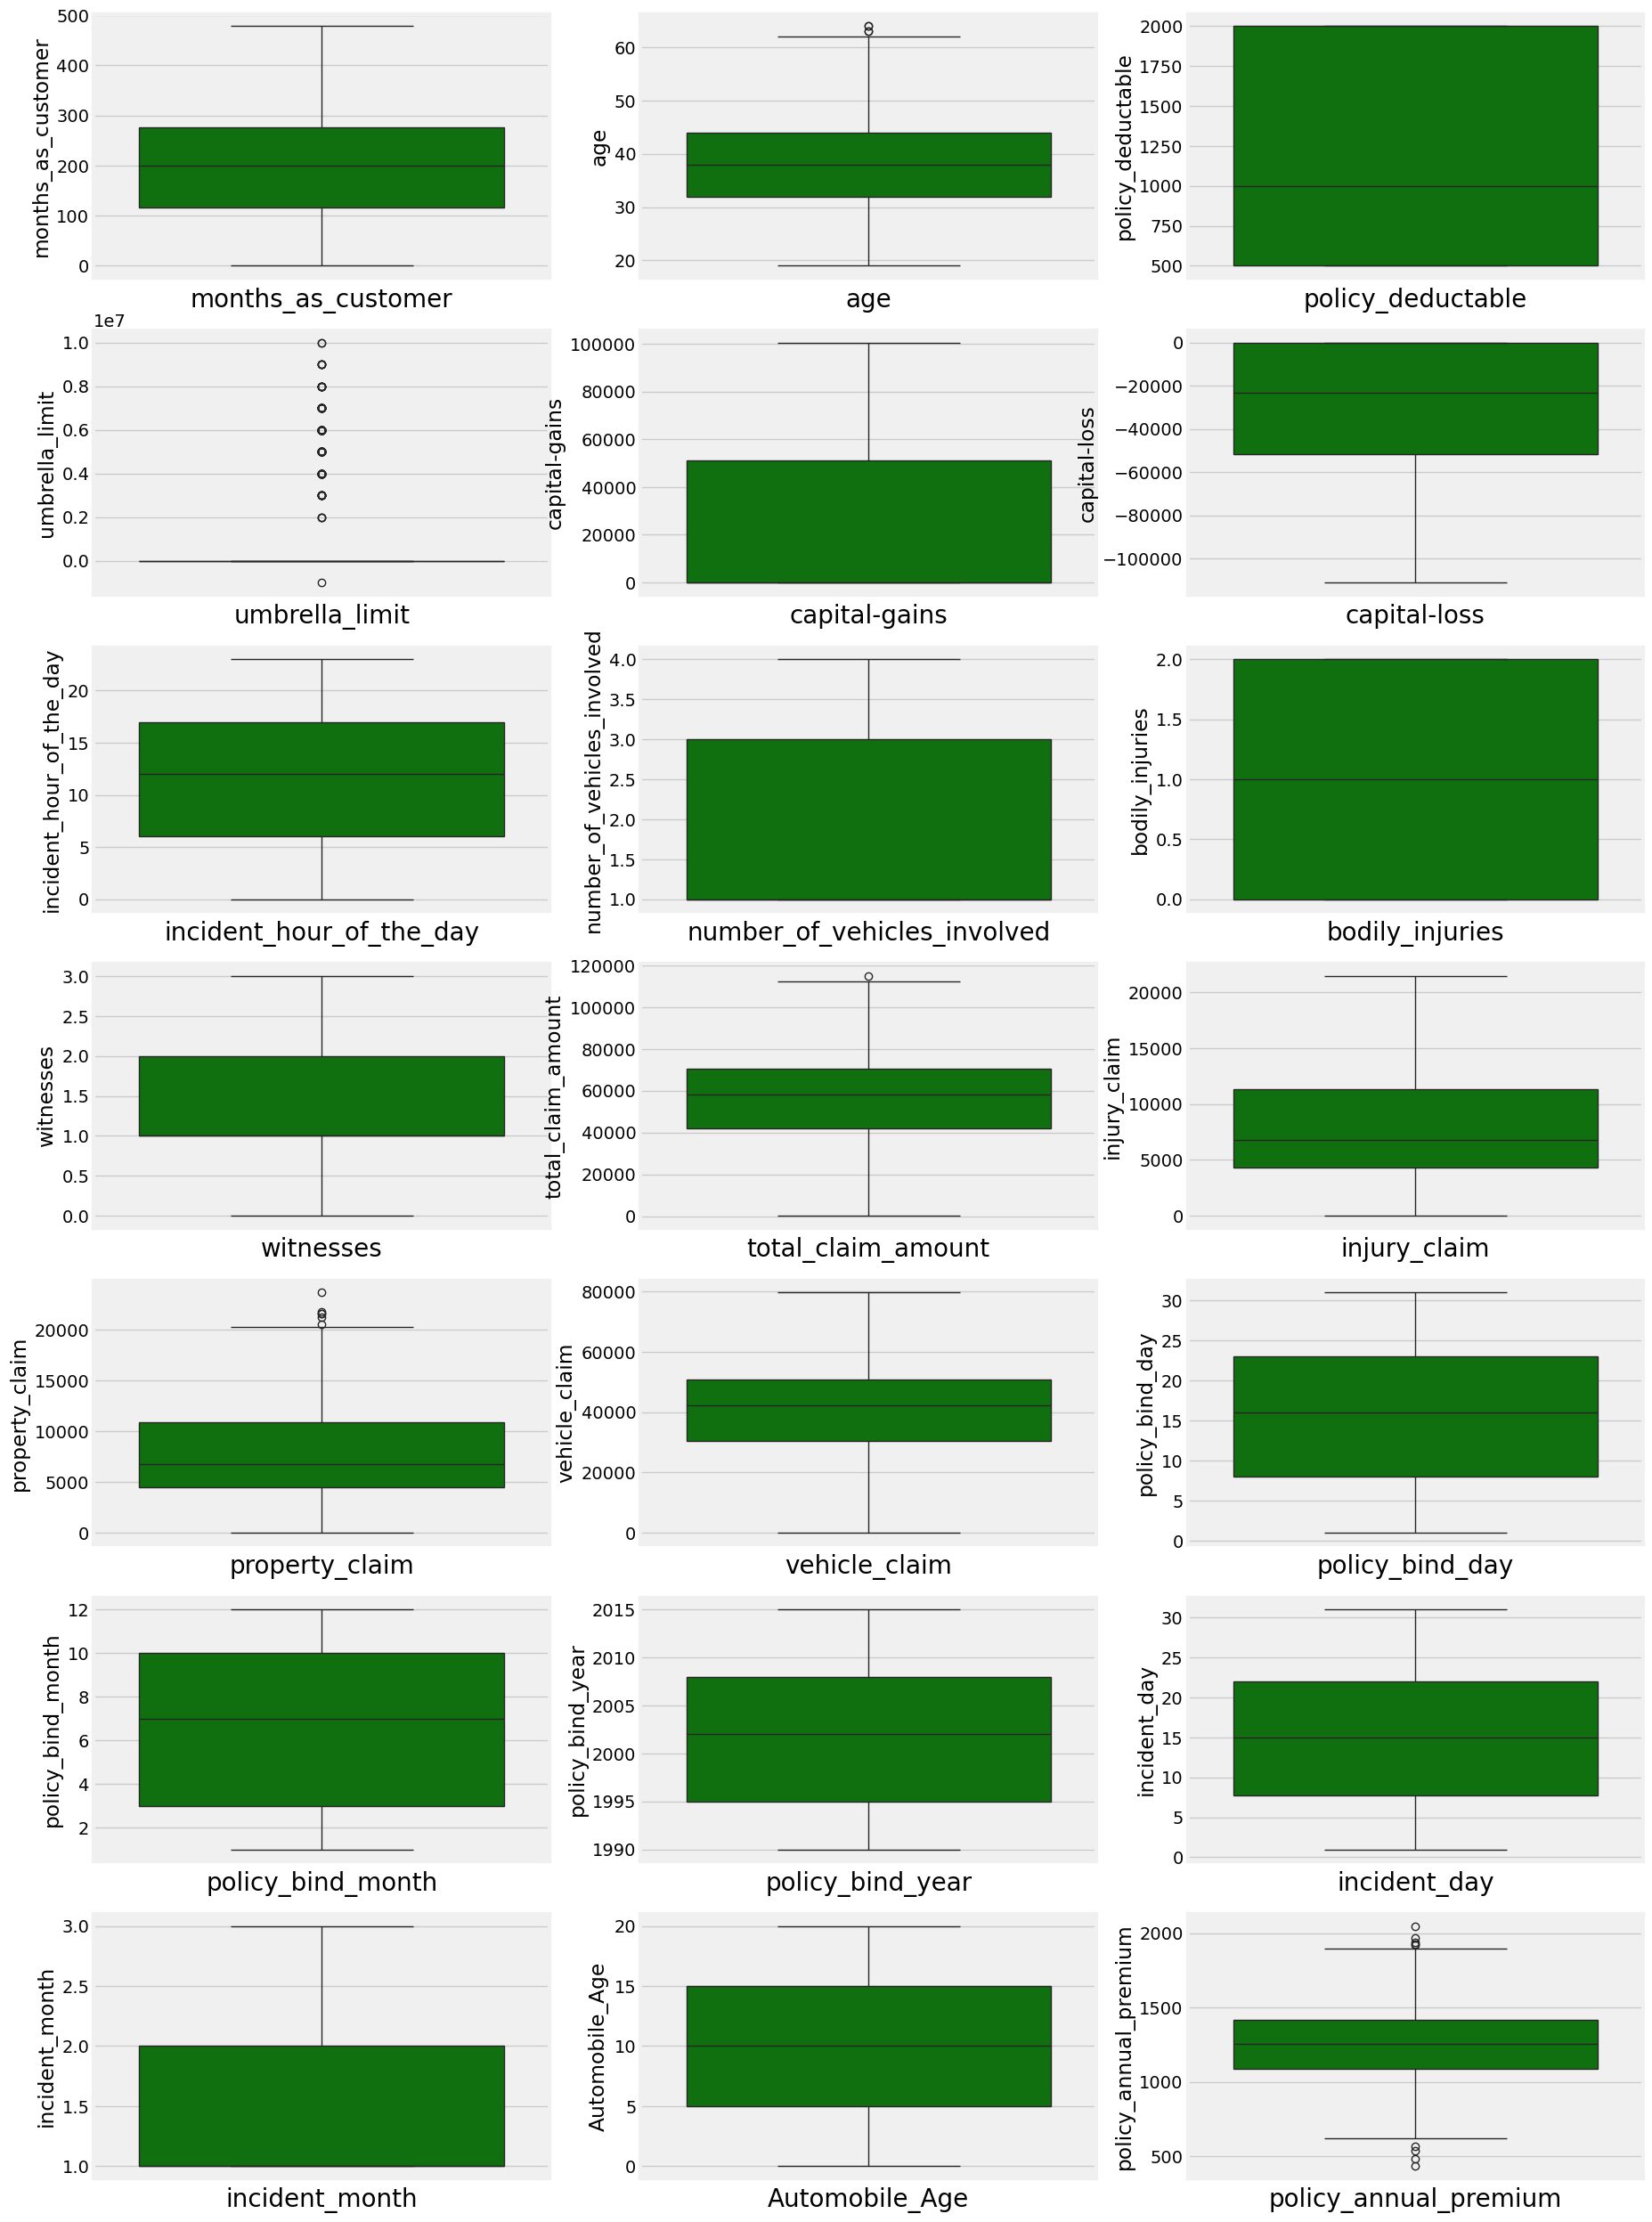

In [160]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [161]:
df

months_as_customer  age  policy_state  policy_deductable  \
0                   328   48           2.0               1000   
1                   228   42           1.0               2000   
2                   134   29           2.0               2000   
3                   256   41           0.0               2000   
4                   228   44           0.0               1000   
..                  ...  ...           ...                ...   
995                   3   38           2.0               1000   
996                 285   41           0.0               1000   
997                 130   34           2.0                500   
998                 458   62           0.0               2000   
999                 456   60           2.0               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0          1.0   
1                  1197.22         5000000          1.0   
2                  1413.14         5000000          0.0   
3                  1415.74         6000000          0.0   
4                  1583.91         6000000          1.0   
..                     ...             ...          ...   
995                1310.80               0          0.0   
996                1436.79               0          0.0   
997                1383.49         3000000          0.0   
998                1356.92         5000000          1.0   
999                 766.19               0          0.0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                        4.0                 2.0             17.0   
1                        4.0                 6.0             15.0   
2                        6.0                11.0              2.0   
3                        6.0                 1.0              2.0   
4                        0.0                11.0              2.0   
..                       ...                 ...              ...   
995                      5.0                 2.0             13.0   
996                      6.0                 9.0             17.0   
997                      5.0                 1.0              3.0   
998                      0.0                 5.0              0.0   
999                      0.0                11.0             11.0   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0.0          53300             0            2.0   
1                     2.0              0             0            3.0   
2                     3.0          35100             0            0.0   
3                     4.0          48900        -62400            2.0   
4                     4.0          66000        -46000            3.0   
..                    ...            ...           ...            ...   
995                   4.0              0             0            2.0   
996                   5.0          70900             0            2.0   
997                   2.0          35100             0            0.0   
998                   5.0              0             0            2.0   
999                   0.0              0             0            1.0   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0               2.0                0.0                    3.0             4.0   
1               1.0                1.0                    3.0             5.0   
2               1.0                1.0                    3.0             1.0   
3               0.0                0.0                    3.0             2.0   
4               1.0                1.0                    NaN             1.0   
..              ...                ...                    ...             ...   
995             0.0                1.0                    1.0             0.0   
996             1.0                0.0                    1.0             4.0   
997             2.0                1.0                    3.0             0.0   

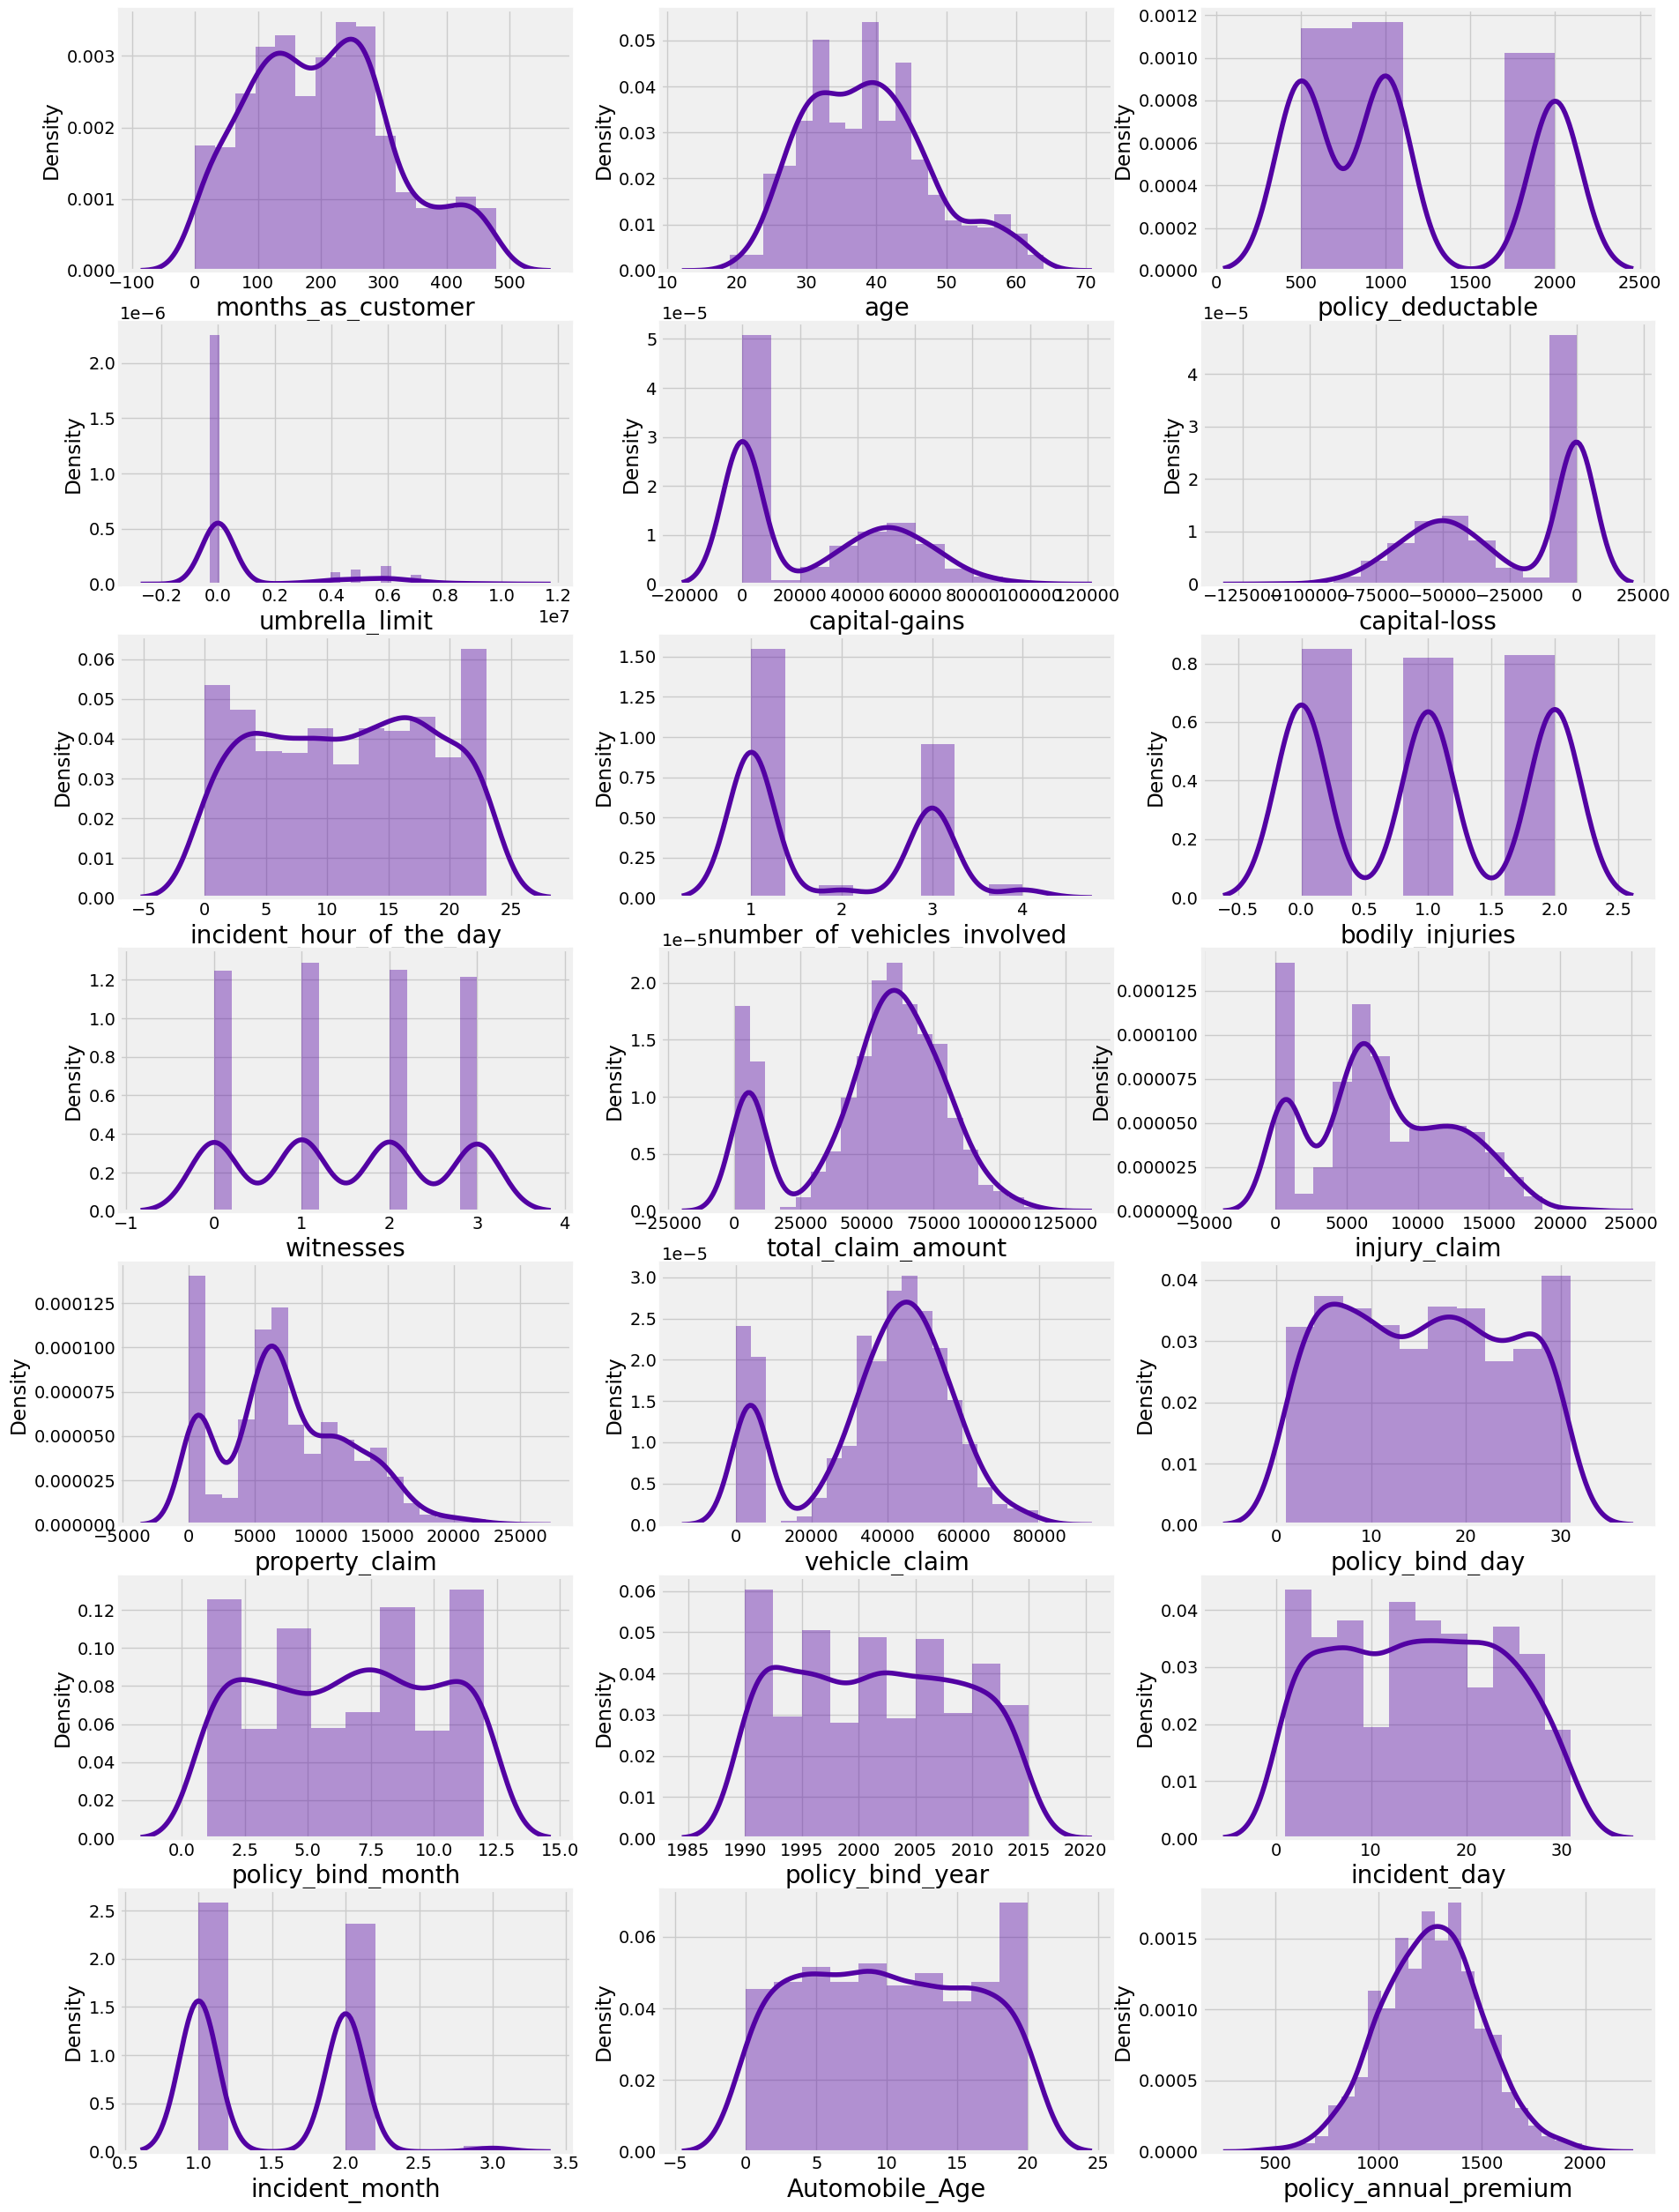

In [163]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')

plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [164]:
df[Numerical].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_bind_day                0.053237
policy_bind_month             -0.016994
policy_bind_year               0.052511
incident_day                   0.039711
incident_month                 0.267378
Automobile_Age                 0.048289
policy_annual_premium          0.004402
dtype: float64

In [165]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922098     -0.000328   
age                                    0.922098  1.000000     -0.014533   
policy_state                          -0.000328 -0.014533      1.000000   
policy_deductable                      0.026807  0.029188      0.010033   
policy_annual_premium                  0.005018  0.014404      0.012455   
umbrella_limit                         0.015498  0.018126     -0.029580   
insured_sex                            0.060925  0.073337     -0.020481   
insured_education_level               -0.000833  0.000969     -0.034327   
insured_occupation                     0.009814  0.017220     -0.031215   
insured_hobbies                       -0.093661 -0.081315     -0.038689   
insured_relationship                   0.069727  0.074832     -0.018506   
capital-gains                          0.006399 -0.007075      0.074551   
capital-loss                           0.020209  0.007368     -0.030338   
incident_type                         -0.017377 -0.025626      0.031848   
collision_type                        -0.072787 -0.075642      0.052438   
incident_severity                     -0.059581 -0.058439     -0.026377   
authorities_contacted                  0.012968  0.017431     -0.014834   
incident_state                         0.005369  0.005770      0.008723   
incident_city                         -0.000130 -0.002291     -0.002077   
incident_hour_of_the_day               0.070639  0.087161      0.029457   
number_of_vehicles_involved            0.014736  0.022102     -0.042263   
property_damage                        0.005488 -0.003408     -0.008465   
bodily_injuries                       -0.010162 -0.015679      0.013384   
witnesses                              0.058383  0.052359      0.022960   
police_report_available               -0.022146 -0.020441      0.069017   
total_claim_amount                     0.062108  0.069863     -0.006002   
injury_claim                           0.065329  0.075522     -0.046290   
property_claim                         0.034940  0.060898      0.008406   
vehicle_claim                          0.061013  0.062588      0.001425   
auto_make                              0.047655  0.030410      0.017124   
auto_model                             0.004202  0.017343     -0.025253   
fraud_reported                         0.020544  0.012143      0.029432   
CSL_Personal                          -0.026819 -0.015185      0.001027   
CSL_Accidental                         0.008876  0.009876      0.028838   
policy_bind_day                        0.054809  0.056776      0.011178   
policy_bind_month                     -0.001559  0.008357      0.046871   
policy_bind_year                      -0.048276 -0.037444     -0.007276   
incident_day                          -0.001455  0.003697      0.025572   
incident_month                        -0.042826 -0.037058      0.018531   
Automobile_Age                         0.000292 -0.001354     -0.002114   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_state                          0.010033               0.012455   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_sex                          -0.009733               0.038853   
insured_education_level               0.015217              -0.019715   
insured_occupation                   -0.046733               0.035922   
insured_hobbies                       0.004061              -0.018019   
insured_relationship                 -0.022945               0.001925   
capital-gains                         0.035212              -0.013738   
capi

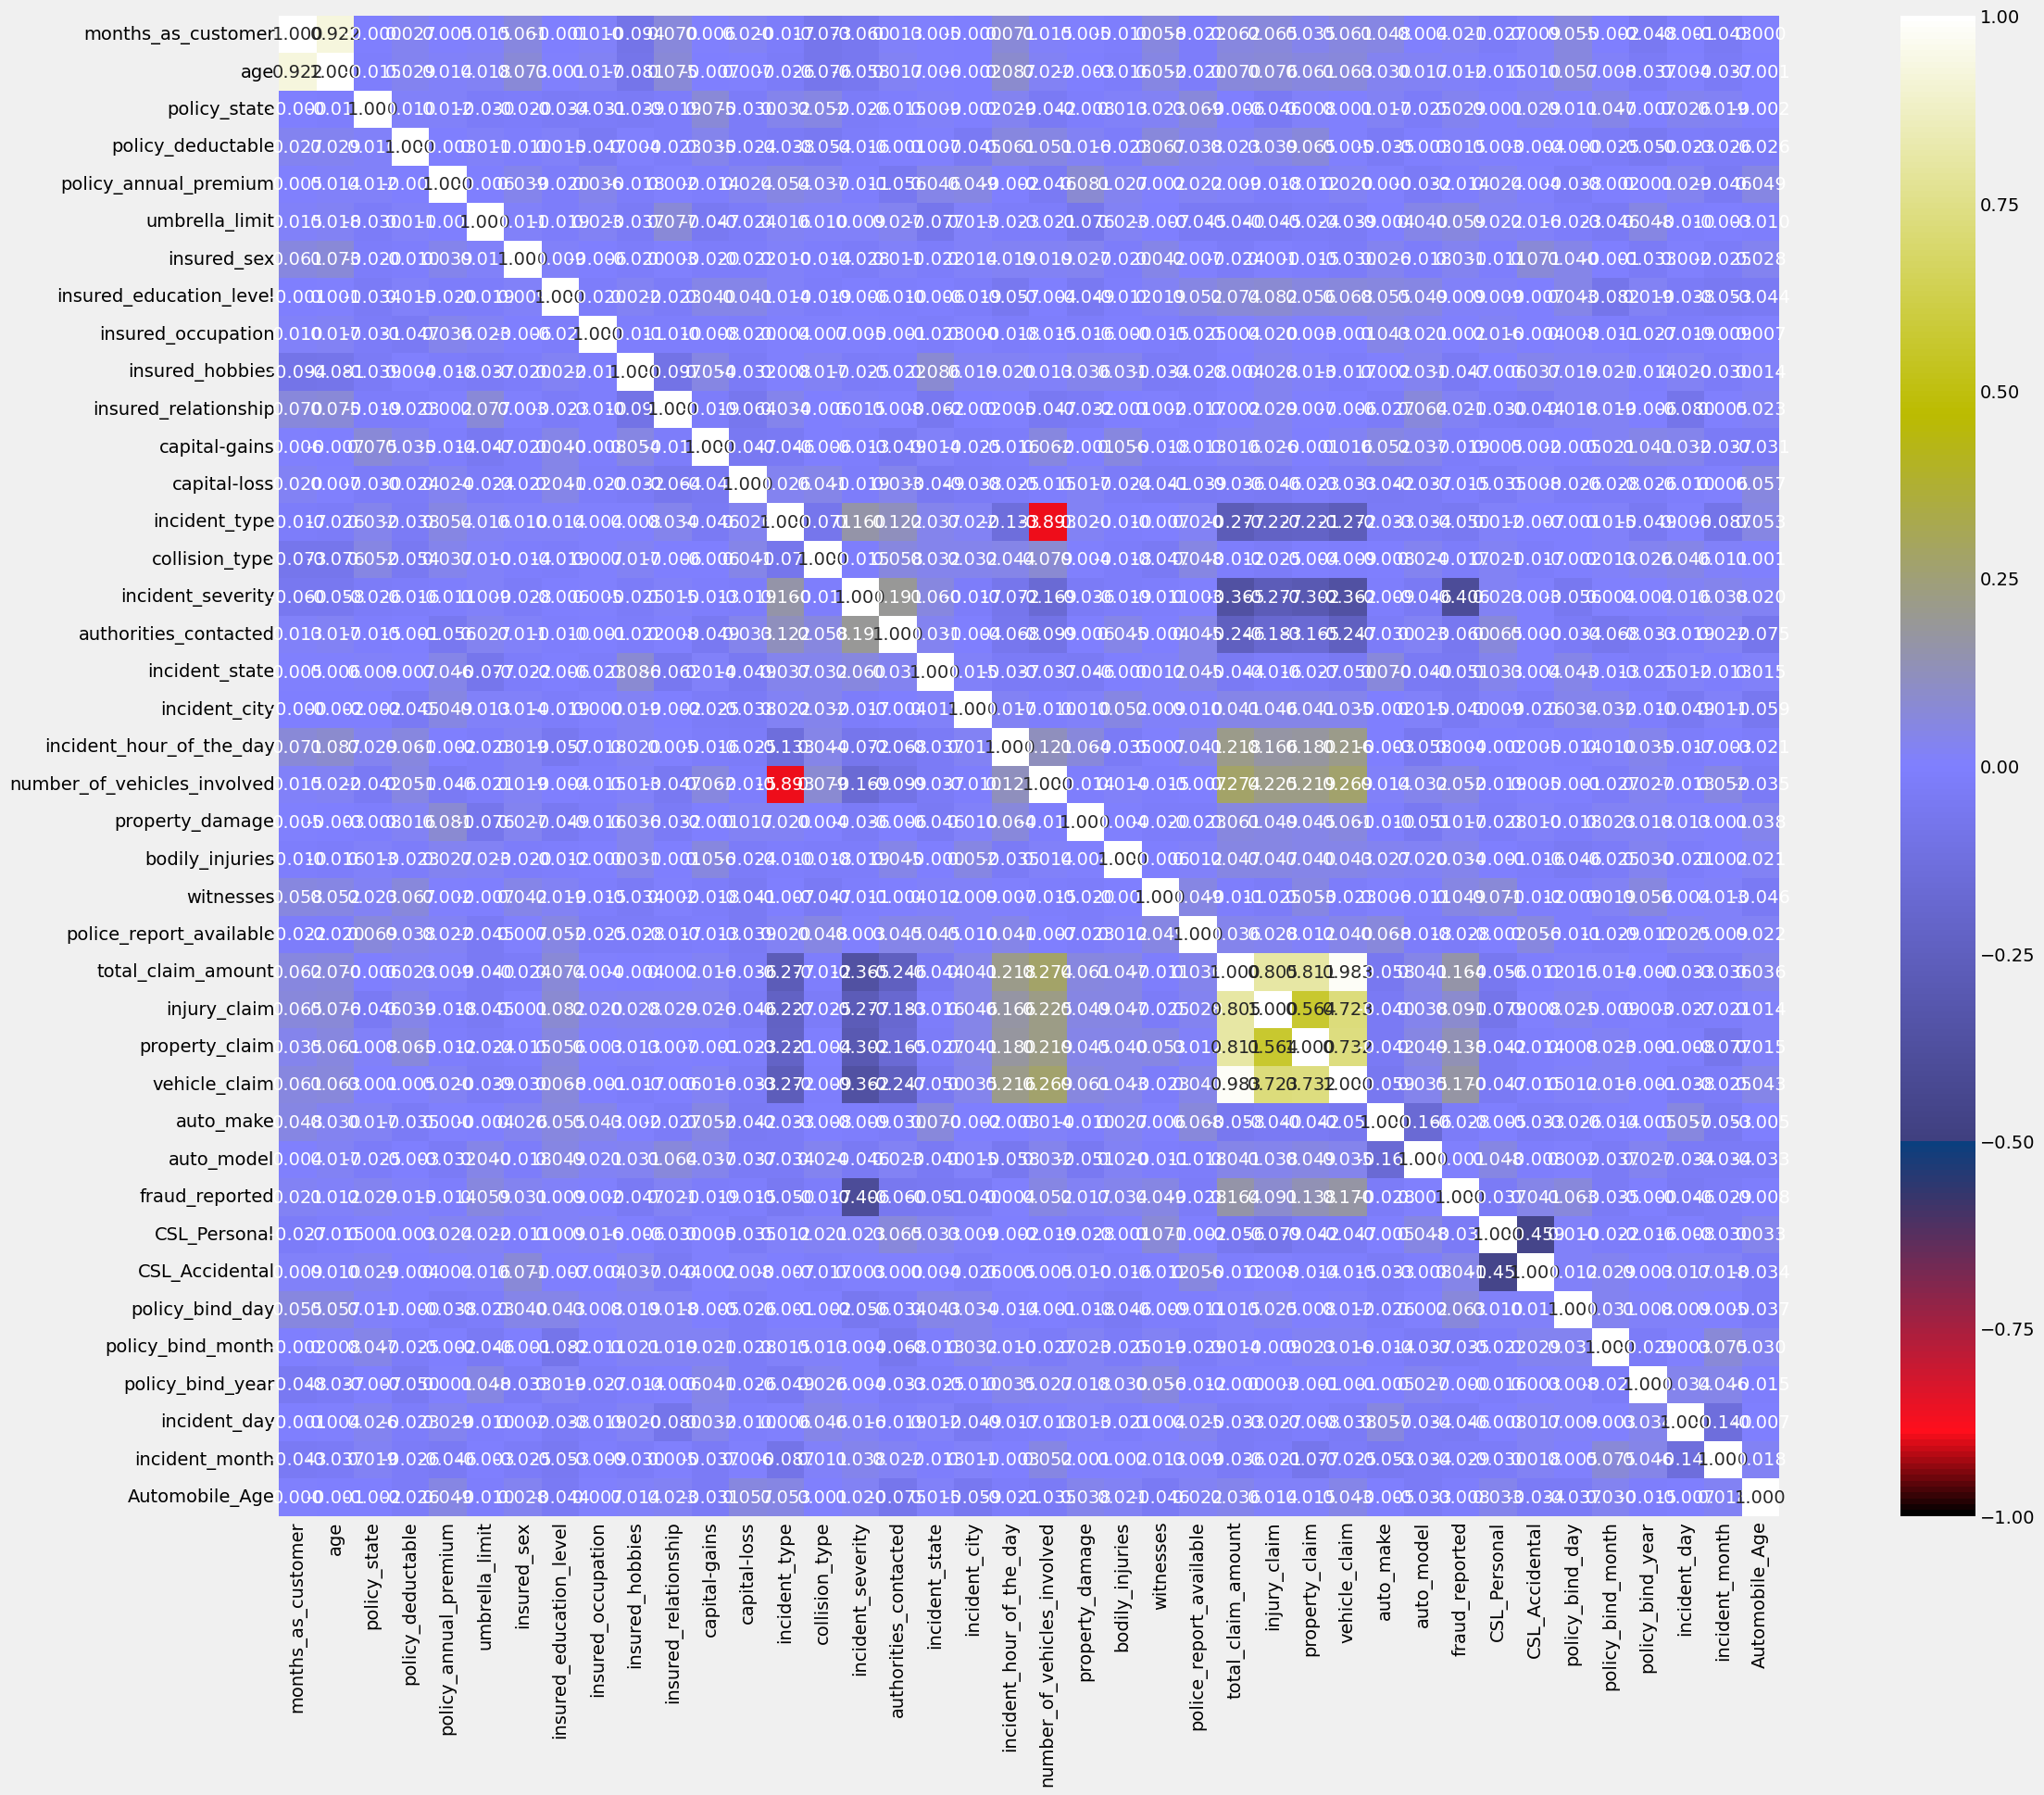

In [166]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

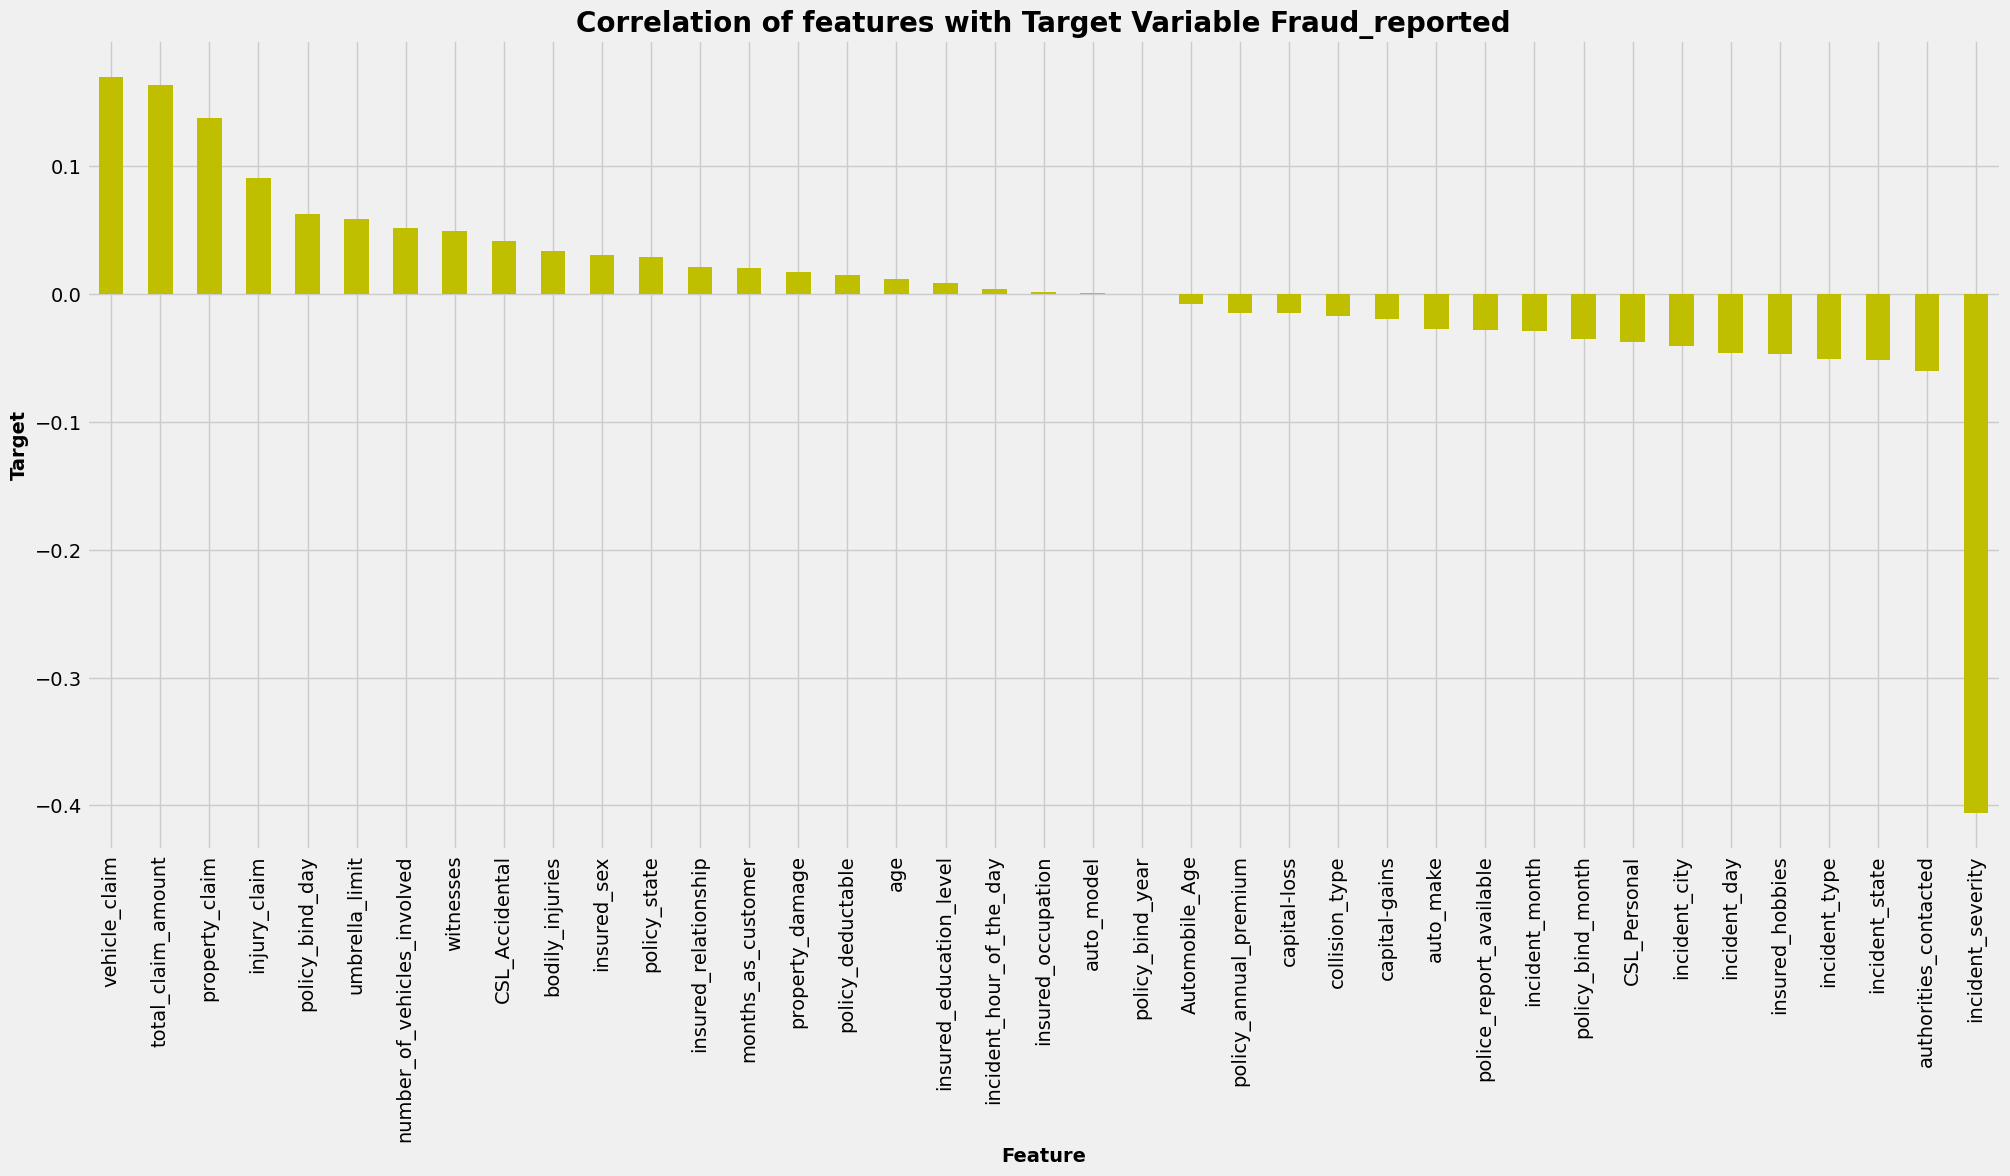

In [167]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

In [168]:
df.fraud_reported.value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

In [172]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_state                    0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_make     

In [173]:
df=df.dropna()

In [174]:
from imblearn.over_sampling import SMOTE

In [175]:
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [176]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [177]:
Y.value_counts()

fraud_reported
1    668
0    668
Name: count, dtype: int64

In [178]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0   7.129806e+00           months_as_customer
1   7.159999e+00                          age
2   1.050662e+00                 policy_state
3   1.068797e+00            policy_deductable
4   1.055784e+00        policy_annual_premium
5   1.059123e+00               umbrella_limit
6   1.038988e+00                  insured_sex
7   1.059111e+00      insured_education_level
8   1.031929e+00           insured_occupation
9   1.082203e+00              insured_hobbies
10  1.069182e+00         insured_relationship
11  1.053404e+00                capital-gains
12  1.058406e+00                 capital-loss
13  6.375668e+00                incident_type
14  1.067406e+00               collision_type
15  1.219337e+00            incident_severity
16  1.128349e+00        authorities_contacted
17  1.057223e+00               incident_state
18  1.027857e+00                incident_city
19  1.087555e+00     incident_hour_of_the_day
20  6.269321e+00  number_of_vehicles_involved
21  1.059798e+00              property_damage
22  1.051056e+00              bodily_injuries
23  1.081878e+00                    witnesses
24  1.059822e+00      police_report_available
25  1.598918e+09           total_claim_amount
26  6.780694e+07                 injury_claim
27  6.732544e+07               property_claim
28  8.183372e+08                vehicle_claim
29  1.075900e+00                    auto_make
30  1.079706e+00                   auto_model
31  1.303422e+00                 CSL_Personal
32  1.282182e+00               CSL_Accidental
33  1.030837e+00              policy_bind_day
34  1.053648e+00            policy_bind_month
35  1.044099e+00             policy_bind_year
36  1.077667e+00                 incident_day
37  1.141879e+00               incident_month
38  1.041953e+00               Automobile_Age

In [180]:
from sklearn.decomposition import PCA

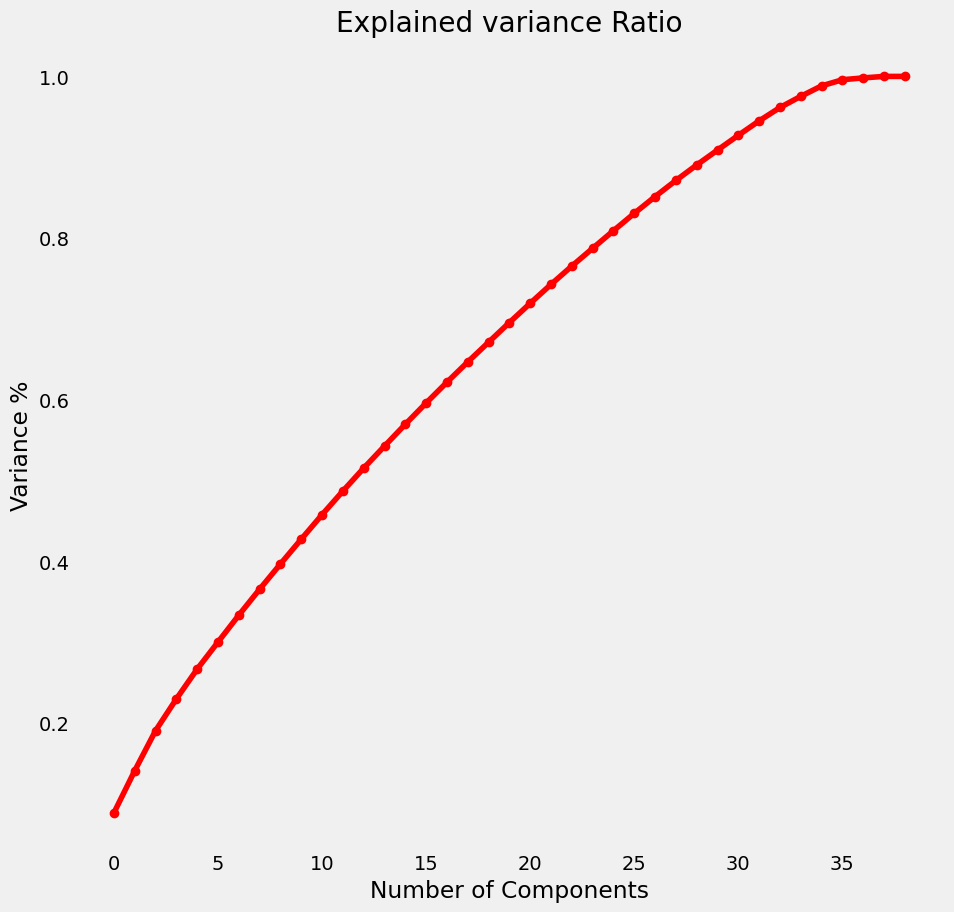

In [181]:
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [182]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [183]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (935, 28)
Training target vector size: (935,)
Test feature matrix size: (401, 28)
Test target vector size: (401,)


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [187]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.773067331670823 on Random_state 200


In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=200, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.773067331670823


Confusion matrix of Logistics Regression : 
 [[154  41]
 [ 50 156]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       195
           1       0.79      0.76      0.77       206

    accuracy                           0.77       401
   macro avg       0.77      0.77      0.77       401
weighted avg       0.77      0.77      0.77       401



In [189]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [190]:
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.533187843829902
RMSE value for k=  2 is: 0.46845637104331533
RMSE value for k=  3 is: 0.5493137863828146
RMSE value for k=  4 is: 0.5213640272187998
RMSE value for k=  5 is: 0.5845048205847263
RMSE value for k=  6 is: 0.5470391853644394
RMSE value for k=  7 is: 0.5845048205847263
RMSE value for k=  8 is: 0.5693764362744025
RMSE value for k=  9 is: 0.5887558207430759
RMSE value for k=  10 is: 0.5671822992640935
RMSE value for k=  11 is: 0.5887558207430759
RMSE value for k=  12 is: 0.5780697090565101
RMSE value for k=  13 is: 0.5992514033267068
RMSE value for k=  14 is: 0.5845048205847263
RMSE value for k=  15 is: 0.6054614282901365
RMSE value for k=  16 is: 0.5908698520358674
RMSE value for k=  17 is: 0.6054614282901365
RMSE value for k=  18 is: 0.5929763466032374
RMSE value for k=  19 is: 0.6136437105448664
RMSE value for k=  20 is: 0.5950753844824684


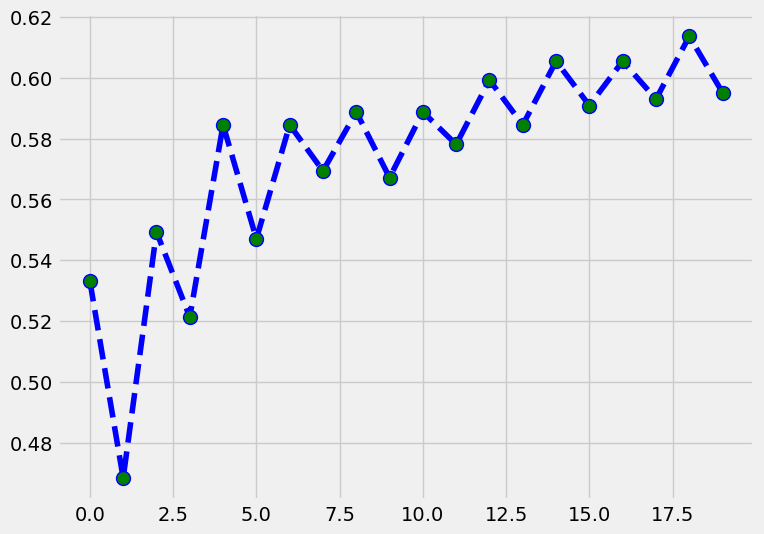

In [191]:
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [192]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.773067331670823


Confusion matrix : 
 [[154  41]
 [ 50 156]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       195
           1       0.79      0.76      0.77       206

    accuracy                           0.77       401
   macro avg       0.77      0.77      0.77       401
weighted avg       0.77      0.77      0.77       401



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8104738154613467


Confusion matrix : 
 [[167  28]
 [ 48 158]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.86      0.81       195
           1       0.85      0.77      0.81       206

    accuracy                           0.81       401
   macro avg       0.81      0.81      0.81       401
weighted avg       0.81      0.81      0.81      

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.6641791  0.64419476 0.76029963 0.74157303 0.76779026]
Mean Score : 0.7156073564760467
Std deviation : 0.05126264815607992




Cross Validation Score SVC() :

Score : [0.70522388 0.72659176 0.87640449 0.87265918 0.88764045]
Mean Score : 0.8137039521493655
Std deviation : 0.08028716204137708




Cross Validation Score GaussianNB() :

Score : [0.63432836 0.65543071 0.83520599 0.80149813 0.80524345]
Mean Score : 0.7463413270725027
Std deviation : 0.08392890581238702




Cross Validation Score DecisionTreeClassifier() :

Score : [0.63432836 0.61048689 0.70786517 0.74531835 0.74157303]
Mean Score : 0.6879143607803678
Std deviation : 0.055567938262695474




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.67164179 0.64044944 0.72284644 0.73782772 0.71161049]
Mean Score : 0.6968751746883559
Std deviation : 0.035747263179138636




Cross Validation Score RandomForestClassifier() :

Score : [0.76119403 0.7078651

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [197]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.807 total time=   0.4s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.818 total time=   0.2s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.818 total time=   0.2s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [198]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 400}

In [199]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 400, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8653366583541147


In [201]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

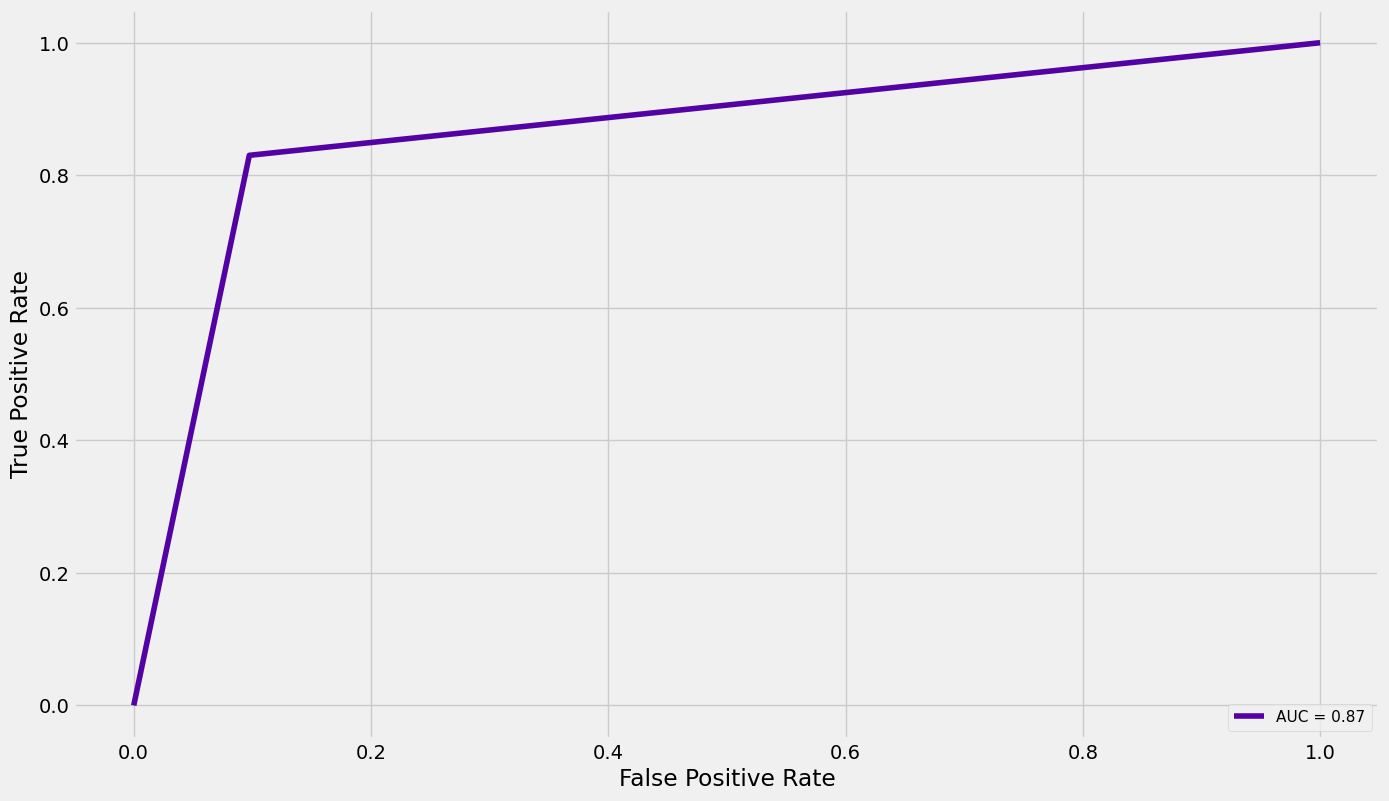

In [202]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()  
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [206]:
import joblib
joblib.dump(Final_mod,'Insurance_Fraud_Detection_Final.pkl')

['Insurance_Fraud_Detection_Final.pkl']

In [207]:
model=joblib.load("Insurance_Fraud_Detection_Final.pkl")
prediction=model.predict(X_test)
prediction

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [208]:
a=np.array(Y_test)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Actual']=a
df1

Predicted  Actual
0            1       1
1            0       0
2            0       0
3            1       1
4            1       1
..         ...     ...
396          1       1
397          1       1
398          1       1
399          1       1
400          1       1

[401 rows x 2 columns]